In [1]:
%load_ext cudf.pandas

# Re-organize InSAR ice velocity data

This is an example of cleaning data accessed in netcdf format and preparing it for analysis. 

The dataset we will use contains InSAR-derived ice velocity for 10 years over the Amundsen Sea Embayment in Antarctica. The data is downloaded from: https://nsidc.org/data/NSIDC-0545/versions/1 but this example uses only a subset of the full dataset.

Downloaded data is `.hdr` and `.dat` files for each year, and a `.nc` for all of the years together. 

The `.nc` object is a dataset with dimensions x,y and data vars for each year. So for each year there are `vx`,`vy`,`err` vars. We'd like to re-organize this so that there are 3 variables (`vx`, `vy` and `err`) that exist along a time dimension.

```{note}
These steps were turned into a accessor/extension example, which can be viewed [here](/advanced/accessors/01_accessor_examples).
```

In [2]:
%%cudf.pandas.profile

import xarray as xr
import pandas as pd
import os
import numpy as np

                                                                                              
                                  Total time elapsed: 1.543 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [3]:
%%cudf.pandas.profile

ds = xr.tutorial.open_dataset('ASE_ice_velocity.nc')
ds

<xarray.Dataset>
Dimensions:  (ny: 800, nx: 500)
Dimensions without coordinates: ny, nx
Data variables: (12/32)
    vx1996   (ny, nx) float32 ...
    vy1996   (ny, nx) float32 ...
    err1996  (ny, nx) float32 ...
    vx2000   (ny, nx) float32 ...
    vy2000   (ny, nx) float32 ...
    err2000  (ny, nx) float32 ...
    ...       ...
    err2011  (ny, nx) float32 ...
    vx2012   (ny, nx) float32 ...
    vy2012   (ny, nx) float32 ...
    err2012  (ny, nx) float32 ...
    xaxis    (nx) float32 ...
    yaxis    (ny) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

                                                                                              
                                  Total time elapsed: 1.553 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                64 CPU function calls in 0.034 seconds                        
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ isna     │ 0          │ 0.000       │ 0.000       │ 64         │ 0.034       │ 0.001       │
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=240556;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

Take a look at the dataset:

In [4]:
%%cudf.pandas.profile

ds

<xarray.Dataset>
Dimensions:  (ny: 800, nx: 500)
Dimensions without coordinates: ny, nx
Data variables: (12/32)
    vx1996   (ny, nx) float32 ...
    vy1996   (ny, nx) float32 ...
    err1996  (ny, nx) float32 ...
    vx2000   (ny, nx) float32 ...
    vy2000   (ny, nx) float32 ...
    err2000  (ny, nx) float32 ...
    ...       ...
    err2011  (ny, nx) float32 ...
    vx2012   (ny, nx) float32 ...
    vy2012   (ny, nx) float32 ...
    err2012  (ny, nx) float32 ...
    xaxis    (nx) float32 ...
    yaxis    (ny) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

                                                                                              
                                  Total time elapsed: 0.065 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Check the projection:

In [5]:
%%cudf.pandas.profile

ds.attrs['Projection']

'         Polar Stereographic South'

                                                                                              
                                  Total time elapsed: 0.033 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Currently the dimensions on the object are `ny` and `nx` but the object has no coordinates. If we look in the `data_vars` we can see there are two variables named `xaxis` and `yaxis`. It seems like these are the coordinate values that should exist along the `nx` and `ny` dimensions, respectively. Let's confirm that they match the dimensions `nx` and `ny` in length and then assign them as coordinates:

In [6]:
%%cudf.pandas.profile

print(ds.dims['ny'])
print(ds.dims['nx'])

800
500


                                                                                              
                                  Total time elapsed: 0.028 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [7]:
%%cudf.pandas.profile

print(len(ds.yaxis.data))
print(len(ds.xaxis.data))

800
500


                                                                                              
                                  Total time elapsed: 0.030 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

We'll assign the `xaxis` and `yaxis` vars to be coordinates, and drop them from the `data_vars`. We'll first use `swap_dims()` to swap `ny` for `yaxis` and `nx` for `xaxis`. 

In [8]:
%%cudf.pandas.profile

ds = ds.swap_dims({'ny': 'yaxis', 'nx': 'xaxis'})

                                                                                                              
                                          Total time elapsed: 1.557 seconds                                   
                                        30 GPU function calls in 1.505 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Index                    │ 2          │ 1.496       │ 0.748       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__     │ 22         │ 0.007       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy        │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__setattr__ │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [9]:
%%cudf.pandas.profile

ds

<xarray.Dataset>
Dimensions:  (yaxis: 800, xaxis: 500)
Coordinates:
  * xaxis    (xaxis) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * yaxis    (yaxis) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Data variables: (12/30)
    vx1996   (yaxis, xaxis) float32 ...
    vy1996   (yaxis, xaxis) float32 ...
    err1996  (yaxis, xaxis) float32 ...
    vx2000   (yaxis, xaxis) float32 ...
    vy2000   (yaxis, xaxis) float32 ...
    err2000  (yaxis, xaxis) float32 ...
    ...       ...
    vx2011   (yaxis, xaxis) float32 ...
    vy2011   (yaxis, xaxis) float32 ...
    err2011  (yaxis, xaxis) float32 ...
    vx2012   (yaxis, xaxis) float32 ...
    vy2012   (yaxis, xaxis) float32 ...
    err2012  (yaxis, xaxis) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

                                                                                                              
                                          Total time elapsed: 0.223 seconds                                   
                                       156 GPU function calls in 0.066 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 142        │ 0.041       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.015       │ 0.007       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Rename `yaxis` and `xaxis` and drop the `nx` and `ny` coordinates: 

In [10]:
%%cudf.pandas.profile

ds = ds.rename({'xaxis': 'x', 'yaxis': 'y'})

                                                                                                          
                                        Total time elapsed: 0.052 seconds                                 
                                      20 GPU function calls in 0.007 seconds                              
                                      0 CPU function calls in 0.000 seconds                               
                                                                                                          
                                                      Stats                                               
                                                                                                          
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function             ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__ │ 16         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.rename  │ 2          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy    │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└──────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [11]:
%%cudf.pandas.profile

ds

<xarray.Dataset>
Dimensions:  (y: 800, x: 500)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Data variables: (12/30)
    vx1996   (y, x) float32 ...
    vy1996   (y, x) float32 ...
    err1996  (y, x) float32 ...
    vx2000   (y, x) float32 ...
    vy2000   (y, x) float32 ...
    err2000  (y, x) float32 ...
    ...       ...
    vx2011   (y, x) float32 ...
    vy2011   (y, x) float32 ...
    err2011  (y, x) float32 ...
    vx2012   (y, x) float32 ...
    vy2012   (y, x) float32 ...
    err2012  (y, x) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

                                                                                                              
                                          Total time elapsed: 0.230 seconds                                   
                                       156 GPU function calls in 0.064 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 142        │ 0.042       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.013       │ 0.006       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Now we have x and y coordinates and 30 data variables. However, the `data_vars` are really only 3 unique variables that exist along a time dimension (with a length of 10). 
We want to add a time dimension to the dataset and concatenate the data variables in each of the three groups together.

Start by making a few objects that we'll use while we're re-organizing. These are: a list of all the variables in the dataset (`var_ls`), a list of the years covered by the dataset that are currently stored in variable names (`yr_ls`) and then finally lists for each variable (`vx_ls`,`vy_ls` and `err_ls`). These are all of the variables in the original dataset that correspond with that main variable group (`vx`, `vy` or `err`).

In [12]:
%%cudf.pandas.profile

var_ls = list(ds)

vx_ls = [var for var in var_ls if 'vx' in var]
vy_ls = [var for var in var_ls if 'vy' in var]
err_ls = [var for var in var_ls if 'err' in var]

yr_ls = [int(var[-4:]) for var in vx_ls]

                                                                                              
                                  Total time elapsed: 0.032 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Now we are going to group the `dataset.data_vars` into `vx`,`vy`, and `err` and prepare to concatenate them along the time dimension. We will perform the same operations for all three variables but we will demonstrate the process for the first variable in several steps, before showing the operation wrapped into one command for the other two variables. There is a great explanation of this kind of step [here](https://towardsdatascience.com/pythonic-way-to-perform-statistics-across-multiple-variables-with-xarray-d0221c78e34a). At the end of this step, for `vx`, `vy` and `err` we will have a list of `xr.DataArrays` that all have a time dimension on the 0-axis. 

In the cell below, we make a list of the `xr.DataArrays` in the original `xr.Dataset` that correspond to that variable. 

In [13]:
%%cudf.pandas.profile

da_vx_ls = [ds[var] for var in vx_ls]

                                                                                              
                                  Total time elapsed: 0.030 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

You can see that `da_vx_ls` is a `list` object with a length of 10, and each element of the list is a `xr.DataArray` corresponding to `vx` vars in the original `xr.Dataset`

In [14]:
%%cudf.pandas.profile

print('Object type: ', type(da_vx_ls))
print('Object length: ', len(da_vx_ls))
da_vx_ls[0]

Object type:  <class 'list'>
Object length:  10


<xarray.DataArray 'vx1996' (y: 800, x: 500)>
[400000 values with dtype=float32]
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

                                                                                                              
                                          Total time elapsed: 0.199 seconds                                   
                                       156 GPU function calls in 0.064 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 142        │ 0.041       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.013       │ 0.007       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

next, we will add a time dimension to every element of `da_vx_ls`:

In [15]:
%%cudf.pandas.profile

da_vx_ls = [da_vx_ls[var].expand_dims('time') for var in range(len(da_vx_ls))]

                                                                                                          
                                        Total time elapsed: 0.081 seconds                                 
                                      40 GPU function calls in 0.012 seconds                              
                                      0 CPU function calls in 0.000 seconds                               
                                                                                                          
                                                      Stats                                               
                                                                                                          
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function             ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__ │ 40         │ 0.012       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└──────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Now you can see that each list element is an `xr.DataArray` as before, but that there is now a time dimension.

In [16]:
%%cudf.pandas.profile

da_vx_ls[0]

<xarray.DataArray 'vx1996' (time: 1, y: 800, x: 500)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  9.245862  ,  18.962032  ,  10.641378  , ..., -55.529568  ,
         -55.257446  , -55.041527  ],
        [  8.298822  ,  15.363108  ,   0.68973774, ..., -55.069824  ,
         -54.748978  , -54.98798   ],
        [  9.707195  ,  10.79028   ,  -6.217383  , ..., -54.61062   ,
         -55.119358  , -54.695946  ]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Dimensions without coordinates: time
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

                                                                                                              
                                          Total time elapsed: 0.209 seconds                                   
                                       156 GPU function calls in 0.064 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 142        │ 0.041       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.013       │ 0.006       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Assign time as a coordinate to each `xr.DataArray` in the list: 

In [17]:
%%cudf.pandas.profile

da_vx_ls = [da_vx_ls[var].assign_coords(time=[yr_ls[var]]) for var in range(len(da_vx_ls))]
da_vx_ls[0]

<xarray.DataArray 'vx1996' (time: 1, y: 800, x: 500)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  9.245862  ,  18.962032  ,  10.641378  , ..., -55.529568  ,
         -55.257446  , -55.041527  ],
        [  8.298822  ,  15.363108  ,   0.68973774, ..., -55.069824  ,
         -54.748978  , -54.98798   ],
        [  9.707195  ,  10.79028   ,  -6.217383  , ..., -54.61062   ,
         -55.119358  , -54.695946  ]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

                                                                                                              
                                          Total time elapsed: 0.779 seconds                                   
                                       787 GPU function calls in 0.260 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 462        │ 0.132       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy        │ 40         │ 0.015       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Index                    │ 10         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__       │ 220        │ 0.063       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.copy          │ 20         │ 0.007       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__setattr__   │ 20         │ 0.008       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.013       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__repr__      │ 1          │ 0.003       │ 0.003       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Time is now a coordinate as well as a dimension and the coordinate value corresponds to the element-order of the list, ie. the first (0-place) element of `da_vx_ls_test` is the `xr.DataArray` containing the `vx1996` variable, and the `time` coord is 0. In the second (1-place) element, the `xr.DataArray` is called `vx2000` and the `time` coord is 1. 

Finally, we will rename the `xr.DataArrays` to reflect just the variable name, rather than the year, because that is now referenced in the time coordinate. 

In [18]:
%%cudf.pandas.profile

da_vx_ls = [da_vx_ls[var].rename('vx') for var in range(len(da_vx_ls))]

                                                                                              
                                  Total time elapsed: 0.029 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [19]:
%%cudf.pandas.profile

da_vx_ls[2]

<xarray.DataArray 'vx' (time: 1, y: 800, x: 500)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [38.909744, 40.761253, 19.25432 , ...,       nan,       nan,
               nan],
        [38.70002 , 39.267914, 11.182553, ...,       nan,       nan,
               nan],
        [39.49789 , 42.261513, 16.20535 , ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 2002
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

                                                                                                              
                                          Total time elapsed: 0.232 seconds                                   
                                       177 GPU function calls in 0.073 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 142        │ 0.041       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.009       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__       │ 20         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.013       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__repr__      │ 1          │ 0.004       │ 0.004       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Now we have a list of `xr.DataArrays` for the `vx` data variable where each `xr.DataArray` has a time dimension and coordinates along the time dimension. This list is ready to be concatenated along the time dimension. 

First, we will perform the same steps for the other two data variables (`vy` and `err`) before concatenating all three along the time dimension and merging into one `xr.Dataset`. For `vy` and `err`, we will combine the steps followed for `vx` into one operation. Note one other difference between the workflow for `vx` and the workflow for `vy` and `err`: rather than assigning coordinate values using the `assign_coords()` function, we do this within the `expand_dims()` function, where a `time` dimension is added as well as coordinate values for the dimension (`[int(var[-4:])]`).

In [20]:
%%cudf.pandas.profile

da_vy_ls = [ds[var].expand_dims(time=[int(var[-4:])]).rename('vy') for var in vy_ls]

da_err_ls = [ds[var].expand_dims(time=[int(var[-4:])]).rename('err') for var in err_ls]

                                                                                                            
                                         Total time elapsed: 0.364 seconds                                  
                                      260 GPU function calls in 0.089 seconds                               
                                       0 CPU function calls in 0.000 seconds                                
                                                                                                            
                                                       Stats                                                
                                                                                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function               ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__   │ 80         │ 0.023       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Index                  │ 20         │ 0.016       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__     │ 120        │ 0.035       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.copy        │ 20         │ 0.007       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__setattr__ │ 20         │ 0.008       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Once we have these lists, we will concatenate them together to a single `xr.DataArray` with `x`,`y` and `time` dimensions. In the above step, when we create the time dimension we assign a stand-in for the time coordinate. In the cell below, we'll use the `yr_ls` object that we created that is a list whose elements are time-aware objects corresponding to the time coordinates (originally in the variable names). The final line in the cell below merges the three `xr.DataArray`s on the common `time` dimension that they now share, so we have a `xr.Dataset` with `x`,`y` and `time` dimensions and `vx`, `vy` and `err` variables.

In [21]:
%%cudf.pandas.profile

vx_concat = xr.concat(da_vx_ls, dim='time')
vy_concat = xr.concat(da_vy_ls, dim='time')
err_concat = xr.concat(da_err_ls, dim='time')

ds_merge = xr.merge([vx_concat, vy_concat, err_concat])

                                                                                                              
                                          Total time elapsed: 2.165 seconds                                   
                                       2367 GPU function calls in 0.760 seconds                               
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 1412       │ 0.404       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__       │ 451        │ 0.130       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy        │ 138        │ 0.052       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.copy          │ 72         │ 0.027       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals      │ 170        │ 0.072       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.set_names   │ 108        │ 0.058       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.append        │ 3          │ 0.008       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__setattr__ │ 6          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__setattr__   │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.equals        │ 4          │ 0.006       │ 0.001       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [22]:
%%cudf.pandas.profile

ds_merge

<xarray.Dataset>
Dimensions:  (x: 500, y: 800, time: 10)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996 2000 2002 2006 2007 2008 2009 2010 2011 2012
Data variables:
    vx       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vy       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    err      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

                                                                                                              
                                          Total time elapsed: 0.351 seconds                                   
                                       234 GPU function calls in 0.092 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 142        │ 0.041       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__       │ 71         │ 0.020       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__getitem__   │ 6          │ 0.005       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.013       │ 0.007       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__repr__      │ 1          │ 0.004       │ 0.004       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

We'll add a variable that is magnitude of velocity as well

In [23]:
%%cudf.pandas.profile

ds_merge['vv'] = np.sqrt((ds_merge.vx**2) + (ds_merge.vy**2))

                                                                                                          
                                        Total time elapsed: 0.215 seconds                                 
                                     165 GPU function calls in 0.050 seconds                              
                                      0 CPU function calls in 0.000 seconds                               
                                                                                                          
                                                      Stats                                               
                                                                                                          
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function             ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__ │ 96         │ 0.028       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__   │ 48         │ 0.014       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy    │ 8          │ 0.003       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.copy      │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals  │ 6          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.equals    │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└──────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

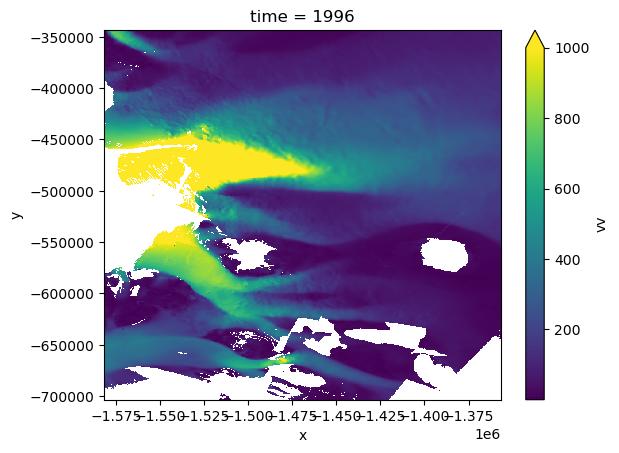

                                                                                                            
                                         Total time elapsed: 2.127 seconds                                  
                                       30 GPU function calls in 0.010 seconds                               
                                       1 CPU function calls in 0.001 seconds                                
                                                                                                            
                                                       Stats                                                
                                                                                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function               ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Int64Index.__len__     │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__   │ 26         │ 0.008       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy      │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ isna                   │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=266463;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [24]:
%%cudf.pandas.profile

ds_merge.vv.isel(time=0).plot(vmax=1000)

and add the `attrs` of the original object to our new object, `ds_full`

In [25]:
%%cudf.pandas.profile

ds_merge.attrs = ds.attrs

                                                                                              
                                  Total time elapsed: 0.026 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [26]:
%%cudf.pandas.profile

ds_merge

<xarray.Dataset>
Dimensions:  (x: 500, y: 800, time: 10)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996 2000 2002 2006 2007 2008 2009 2010 2011 2012
Data variables:
    vx       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vy       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    err      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vv       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

                                                                                                              
                                          Total time elapsed: 0.383 seconds                                   
                                       234 GPU function calls in 0.094 seconds                                
                                        0 CPU function calls in 0.000 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 142        │ 0.041       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__       │ 71         │ 0.021       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__getitem__   │ 6          │ 0.005       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__    │ 2          │ 0.013       │ 0.007       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__repr__      │ 1          │ 0.004       │ 0.004       │ 0          │ 0.000       │ 0.000       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Checking against original version to make sure it's the same:

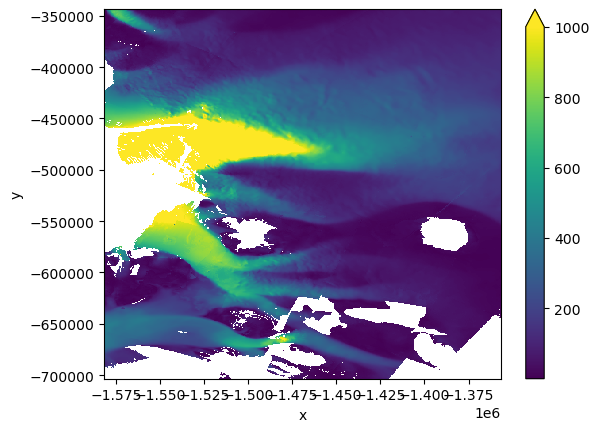

                                                                                                          
                                        Total time elapsed: 1.622 seconds                                 
                                      78 GPU function calls in 0.024 seconds                              
                                      1 CPU function calls in 0.001 seconds                               
                                                                                                          
                                                      Stats                                               
                                                                                                          
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function             ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__ │ 70         │ 0.021       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy    │ 6          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals  │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ isna                 │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└──────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=772634;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [27]:
%%cudf.pandas.profile

np.sqrt((ds.vx1996**2) + (ds.vy1996**2)).plot(vmax=1000)

We can also use `xr.DataArray.equals` function to test if two `xr.DataArrays` are identical to one another. More information [here](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.equals.html). 

In [28]:
%%cudf.pandas.profile

ds_merge['vx'].sel(time=1996, drop=True).equals(ds.vx1996)

True

                                                                                                            
                                         Total time elapsed: 0.066 seconds                                  
                                       26 GPU function calls in 0.013 seconds                               
                                       0 CPU function calls in 0.000 seconds                                
                                                                                                            
                                                       Stats                                                
                                                                                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function               ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__   │ 16         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__     │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.get_loc     │ 1          │ 0.004       │ 0.004       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.set_names │ 4          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals    │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘